## About The Dataset

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Problem Statement

We have 12 columns including one Target column (Survived). we have to train our machine to learn the pattern basis the available data and predict furture data.it is binery classification problem. we will use classification model to trained it.

## Features Informations

Passengerid

Pclass Passenger = Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival = (0 = No; 1 = Yes)

name

sex

age

sibsp = Number of Siblings/Spouses Aboard

parch = Number of Parents/Children Aboard

ticket = Ticket Number

fare Passenger Fare = (British pound)

cabin

embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Importing The Dataset

In [2]:
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


There are 891 rows and 12 columns. Survived is the target column 

In [3]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Name,Sex, Ticket, CAbin, and embarked are float data type. Sex, Survived, class and  Embarked are categorical type.

There are few null values also in Age,Cabin and Embarked columns.

## Exploratory Data Analysis

### Missing Data

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So ['Age'] column has 177 null values, ['Cabin'] has 687 null values and ['Embarked'] has 2 null values.

<AxesSubplot:>

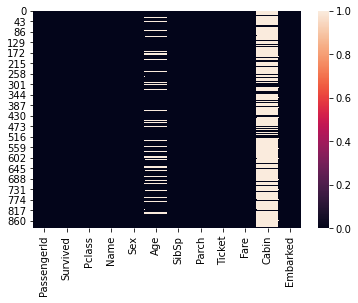

In [6]:
#To check missing values
sns.heatmap(titanic_df.isnull())

We can clearly see from heat map also that there are many missing data in Age and so many missing data in Cabin.

Roughly 20% OF Age data is missing. The proportion of age missing ids likely small enough for reasonable replacement with some form of imputation.

Looking at the Cabin column,it looks like we are missing majority of the data to do something basic like imputation. So we drop the Cabin column.

### Imputing Missing Values

In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
titanic_df['Age']=imp.fit_transform(titanic_df['Age'].values.reshape(-1,1))

In [8]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Here Embarked column has S type most frequently. So that will be filled in place of NaN.

In [9]:
imp=SimpleImputer(strategy='most_frequent')
titanic_df['Embarked']=imp.fit_transform(titanic_df['Embarked'].values.reshape(-1,1))

In [10]:
#Let's drop the Cabin column
titanic_df=titanic_df.drop(['Cabin'],axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
67,68,0,3,"Crease, Mr. Ernest James",male,19.000000,0,0,S.P. 3464,8.1583,S
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.000000,2,0,345764,18.0000,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.000000,1,0,113789,52.0000,S
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.000000,0,0,345783,9.5000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000000,0,0,C.A. 24580,10.5000,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.000000,1,0,19996,52.0000,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,29.699118,0,0,330932,7.7875,Q
378,379,0,3,"Betros, Mr. Tannous",male,20.000000,0,0,2648,4.0125,C
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,29.699118,0,0,370375,7.7500,Q
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S


In [12]:
#Checking Again For null values
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#Getting Statistical measures about the data
titanic_df.describe()  #all numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here other than Age and Fare column , all are categorical columns which doesn't give much information through this table. 
Also we can see the minimum value for fare is 0 which is also a null nalue. So we will change that.

In [14]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
titanic_df[titanic_df.Fare== 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,S


Almost 15 rows have Fare = 0 and all of them have not survived except 1. We will change these 0 values to null values and  replace those null values with mean fare of not survived people.

In [16]:
means=pd.pivot_table(titanic_df,index=['Survived'],aggfunc={'Fare':np.mean})
means

,Fare
Survived,
0,22.117887
1,48.395408


Mean value of fare values is 22.117887 for not survived people.So we will fill in the missing value with 22.117887​.

In [17]:
titanic_df['Fare']=titanic_df['Fare'].replace(to_replace=0,value=22.117887)

In [18]:
#Checking min value of Fare again
titanic_df['Fare'].describe()

count    891.000000
mean      32.576563
std       49.533153
min        4.012500
25%        7.925000
50%       15.100000
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
titanic_df.select_dtypes(include = "object").describe() # describe all object columns

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Culumovic, Mr. Jeso",male,CA. 2343,S
freq,1,577,7,646


In [20]:
# Finding the number of People survived and not survived
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here we can see in the accident out of 891 people, more number of people have not survived. 

Text(0.5, 1.0, 'Survival count plot')

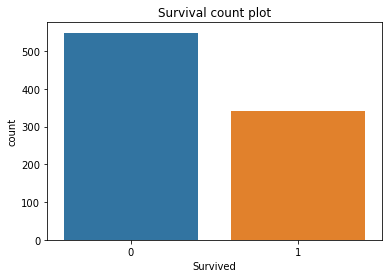

In [21]:
sns.countplot(titanic_df["Survived"])
plt.title("Survival count plot")

Survival count is less than number prople lost their lives

Fare column has extreme max value, count of male onboading on the ship is more than female and maximum people belongs to Southampton

In [22]:
# sex column wise average of other columns
titanic_df.groupby("Sex").mean() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,26.098882


Female paid more fare than male and the average age for male was older than female

In [23]:
titanic_df.groupby(["Pclass","Sex","Survived"])["Survived"].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

Survival ration for females are more than males from 1st class and 2nd class. In 3rd class dead males are more than any other class.

<AxesSubplot:xlabel='Sex', ylabel='count'>

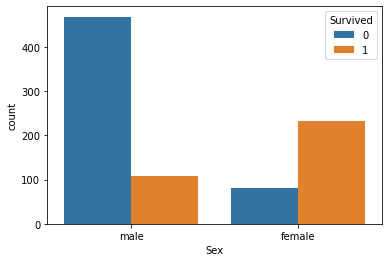

In [24]:
sns.countplot('Sex', hue='Survived', data = titanic_df)

From the count plot also we can see ration of female survivors are more as compared to male survivors

In [25]:
titanic_df.groupby("Pclass").mean()# Pclass column wise average of other columns

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.048118,0.416667,0.356481,84.666676
2,445.956522,0.472826,29.866958,0.402174,0.380435,21.383419
3,439.154786,0.242363,26.403259,0.615071,0.393075,13.855737


Survived people from 1st class are more than 2nd and 3rd class.class 3rd passengers' were younger than other two class categories 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

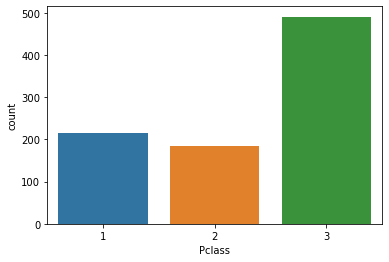

In [26]:
#Making a count plot for pclass only
sns.countplot('Pclass',data=titanic_df)

Number of passengers in 3rd class is highest.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

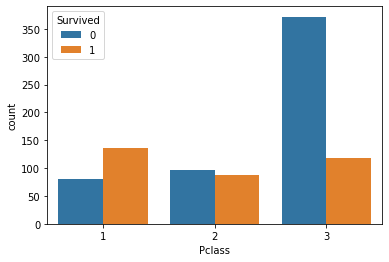

In [27]:
sns.countplot('Pclass', hue='Survived', data = titanic_df)

 Number of passengers survived in 1st class is more than 2nd class and 3rd class.

### Bivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Fare'>

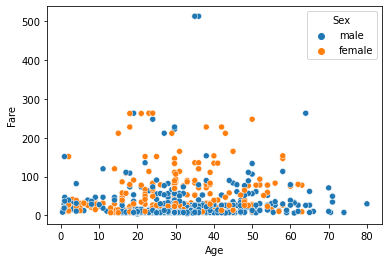

In [28]:
sns.scatterplot(x = "Age",y = "Fare", data = titanic_df, hue = "Sex")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

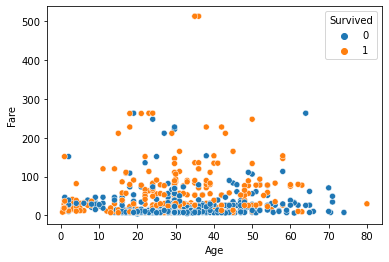

In [29]:
sns.scatterplot(x = "Age",y = "Fare", data = titanic_df, hue = "Survived")

In [30]:
# Since'Sex'  and Embarked Are of categorical dtype. So we are applying Label Encoder
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
titanic_df['Sex']=lencode.fit_transform(titanic_df['Sex'])
titanic_df['Embarked']=lencode.fit_transform(titanic_df['Embarked'])
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [31]:
# 1 = male, 0 = Female in Sex

# 0 for C(Cherbourg), 1 for Q(Queenstown), 2 for S(Southampton) in Embarked


In [32]:
# Column sibsp and parch are carrying the same information about the family. so we can merge them into 1 columns

titanic_df["Family_member"] =titanic_df["SibSp"] +titanic_df["Parch"]  

In [33]:
#Now droping sibsp column and parch column
titanic_df.drop(columns = ["SibSp","Parch"],axis = 1, inplace = True)

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_member
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,2,0


We have name, ticket column which also needs deleting, name is string and ticket is mix of string and number. encoding will no make any sense

In [35]:
titanic_df.drop(columns = ["Name","Ticket"], axis = 1, inplace = True)

In [36]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
0,1,0,3,1,22.000000,7.2500,2,1
1,2,1,1,0,38.000000,71.2833,0,1
2,3,1,3,0,26.000000,7.9250,2,0
3,4,1,1,0,35.000000,53.1000,2,1
4,5,0,3,1,35.000000,8.0500,2,0
5,6,0,3,1,29.699118,8.4583,1,0
6,7,0,1,1,54.000000,51.8625,2,0
7,8,0,3,1,2.000000,21.0750,2,4
8,9,1,3,0,27.000000,11.1333,2,2
9,10,1,2,0,14.000000,30.0708,0,1


<AxesSubplot:xlabel='Survived', ylabel='Density'>

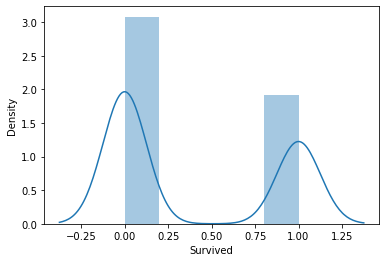

In [37]:
# Target feature distribution 
sns.distplot(titanic_df["Survived"])

### Checking The Correlation

In [38]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,0.014758,0.013128,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,0.253234,-0.167675,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,-0.554656,0.162098,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.177374,0.108262,-0.200988
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,0.093333,-0.026749,-0.248512
Fare,0.014758,0.253234,-0.554656,-0.177374,0.093333,1.000000,-0.221039,0.213622
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,-0.221039,1.000000,0.066516
Family_member,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.213622,0.066516,1.000000


Other tahn Fare and Family members , all the other columns are negatively correlated with Survived column

<AxesSubplot:>

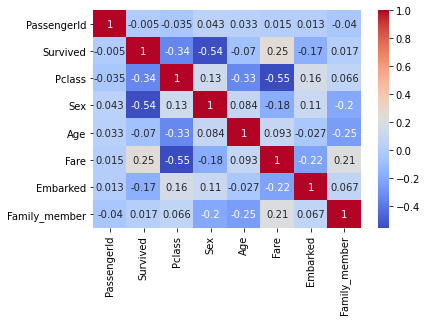

In [39]:
sns.heatmap(titanic_df.corr(),cmap='coolwarm',annot=True)

## Check for Skewness

#### Splitting the independant and target variables in x and y before removing the skewness

In [40]:
x=titanic_df.drop('Survived', axis=1)
y=titanic_df['Survived']
x

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_member
0,1,3,1,22.000000,7.2500,2,1
1,2,1,0,38.000000,71.2833,0,1
2,3,3,0,26.000000,7.9250,2,0
3,4,1,0,35.000000,53.1000,2,1
4,5,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...,...
886,887,2,1,27.000000,13.0000,2,0
887,888,1,0,19.000000,30.0000,2,0
888,889,3,0,29.699118,23.4500,2,3
889,890,1,1,26.000000,30.0000,0,0


In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
# Cheking Skewness
x.skew().sort_values(ascending=False)

Fare             4.815835
Family_member    2.727441
Age              0.434488
PassengerId      0.000000
Sex             -0.618921
Pclass          -0.630548
Embarked        -1.264823
dtype: float64

Fare and Family_member has skewness

In [43]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [44]:
type(x_new)

numpy.ndarray

In [45]:
x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Family_member'],
      dtype='object')

In [46]:
x=pd.DataFrame(x_new, columns=x.columns)
x

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_member
0,-2.148141,0.863973,0.737695,-0.556267,-1.237824,0.610411,0.893828
1,-2.131830,-1.459129,-1.355574,0.657269,1.387923,-1.780520,0.893828
2,-2.117043,0.863973,-1.355574,-0.241577,-1.075503,0.610411,-0.796169
3,-2.103295,-1.459129,-1.355574,0.437923,1.195367,0.610411,0.893828
4,-2.090322,0.863973,0.737695,0.437923,-1.047547,0.610411,-0.796169
...,...,...,...,...,...,...,...
886,1.544720,-0.592604,0.737695,-0.164262,-0.274393,0.610411,-0.796169
887,1.547720,-1.459129,-1.355574,-0.798775,0.722666,0.610411,-0.796169
888,1.550719,0.863973,-1.355574,0.042001,0.470752,0.610411,1.512191
889,1.553717,-1.459129,0.737695,-0.241577,0.722666,-1.780520,-0.796169


In [47]:
# Again Cheking Skewness if it has been removed 
x.skew().sort_values(ascending=False)

Family_member    0.539231
Fare             0.223507
Age              0.064420
PassengerId     -0.283201
Pclass          -0.441438
Sex             -0.618921
Embarked        -1.064527
dtype: float64

In [48]:
x.skew()[np.abs(x.skew())<0.25].all()

True

## Check For Outliers

PassengerId         AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived         AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass           AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Sex              AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Age                    AxesSubplot(0.125,0.125;0.168478x0.343182)
Fare                AxesSubplot(0.327174,0.125;0.168478x0.343182)
Embarked            AxesSubplot(0.529348,0.125;0.168478x0.343182)
Family_member       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

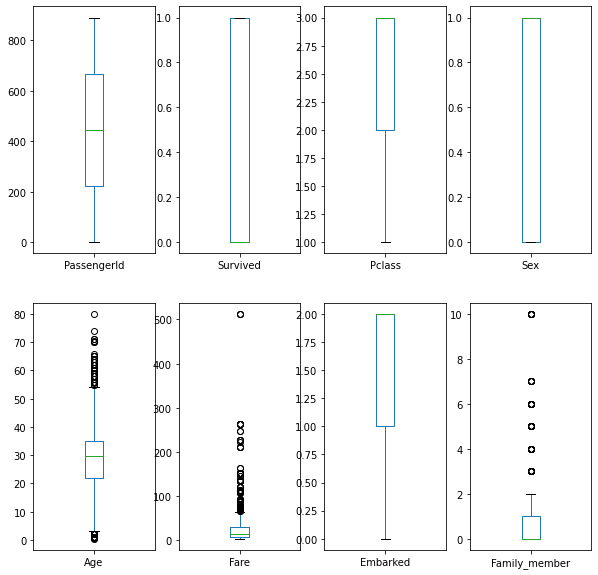

In [49]:
titanic_df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

There are so many outliers in Age, fare and family members column.

#### Removing Outliers

In [50]:
from scipy.stats import zscore

z=np.abs(zscore(titanic_df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.51159245, 0.58595414,
        0.05915988],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.7818698 , 1.9423032 ,
        0.05915988],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.49795756, 0.58595414,
        0.56097483],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.18435509, 0.58595414,
        1.29942929],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.05204615, 1.9423032 ,
        0.56097483],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.50149254, 0.67817453,
        0.56097483]])

In [51]:
z.shape

(891, 8)

In [52]:
threshold=3
print(np.where(z>3))

(array([ 13,  25,  27,  59,  68,  71,  88,  96, 116, 118, 119, 159, 180,
       182, 201, 233, 258, 261, 299, 311, 324, 341, 377, 380, 386, 438,
       480, 493, 527, 541, 542, 557, 610, 630, 672, 678, 679, 683, 689,
       700, 716, 730, 737, 742, 745, 779, 792, 813, 846, 850, 851, 863],
      dtype=int64), array([7, 7, 5, 7, 7, 7, 5, 4, 4, 5, 7, 7, 7, 7, 7, 7, 5, 7, 5, 5, 7, 5,
       5, 5, 7, 5, 7, 4, 5, 7, 7, 5, 7, 4, 4, 7, 5, 7, 5, 5, 5, 5, 5, 5,
       4, 5, 7, 7, 7, 7, 4, 7], dtype=int64))


In [53]:
titanic_new=titanic_df[(z<3).all(axis=1)]
titanic_new

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
0,1,0,3,1,22.000000,7.2500,2,1
1,2,1,1,0,38.000000,71.2833,0,1
2,3,1,3,0,26.000000,7.9250,2,0
3,4,1,1,0,35.000000,53.1000,2,1
4,5,0,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,13.0000,2,0
887,888,1,1,0,19.000000,30.0000,2,0
888,889,0,3,0,29.699118,23.4500,2,3
889,890,1,1,1,26.000000,30.0000,0,0


In [54]:
print(titanic_df.shape)
print(titanic_new.shape)

(891, 8)
(839, 8)


Percentage Data loss

In [55]:
loss_percent=(891-839)/891*100
print(loss_percent)

5.836139169472503


5.83% of data is lost while removing outliers.

## Modeling

In [56]:
# seprate data into train and test and importing some important library
X = titanic_new.drop(columns = "Survived", axis = 1)
Y = titanic_new["Survived"]


sc = StandardScaler()

X = sc.fit_transform(X) # Applying standard scaler for standarized the X values

# Spliting into train & test 

X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size = .20, random_state =150)

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC()]

for model in models:
    model.fit(X_train,Y_train)
    print(model)
    print("Train score",model.score(X_train,Y_train))
    pred = model.predict(X_test)
    print("Test score",model.score(X_test,Y_test))
    print("ROC_Score", model,roc_auc_score(pred,Y_test))
    print("confusion_matrix", model,"\n",confusion_matrix(pred,Y_test))
    print("classification_report ", model,"\n",classification_report(pred,Y_test))

LogisticRegression()
Train score 0.797317436661699
Test score 0.7857142857142857
ROC_Score LogisticRegression() 0.7799756542909312
confusion_matrix LogisticRegression() 
 [[85 21]
 [15 47]]
classification_report  LogisticRegression() 
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       106
           1       0.69      0.76      0.72        62

    accuracy                           0.79       168
   macro avg       0.77      0.78      0.77       168
weighted avg       0.79      0.79      0.79       168

DecisionTreeClassifier()
Train score 1.0
Test score 0.7678571428571429
ROC_Score DecisionTreeClassifier() 0.7593291709016988
confusion_matrix DecisionTreeClassifier() 
 [[79 18]
 [21 50]]
classification_report  DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        97
           1       0.74      0.70      0.72        71

    accuracy                       

Logistic Regression is producing good train score and test score and both the train score and test score values are close enough along with good F1 score, so we are taking and selecting the Logistic Regression algorithm as Final MLA.
will apply Grid searchCV for best parameter finding.

### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
for model in models:
    score=cross_val_score(model,x,y,cv=5)
    print('CV score for',model)
    print(score)
    print(score.mean())
    print(score.std())
    result =model.score(X_train,Y_train) - score.mean()
    print("R2 Score - Cross Validation Score is", result)
    print('\n')

CV score for LogisticRegression()
[0.77653631 0.81460674 0.79213483 0.78089888 0.8258427 ]
0.7980038917833155
0.019175703595240297
R2 Score - Cross Validation Score is -0.0006864551216165804


CV score for DecisionTreeClassifier()
[0.61452514 0.7752809  0.83146067 0.76966292 0.8258427 ]
0.7633544661352081
0.07858172732151018
R2 Score - Cross Validation Score is 0.23664553386479192


CV score for RandomForestClassifier()
[0.73184358 0.80337079 0.84831461 0.81460674 0.85393258]
0.8104136589040236
0.04375116164067029
R2 Score - Cross Validation Score is 0.18958634109597639


CV score for AdaBoostClassifier()
[0.61452514 0.80898876 0.79775281 0.80337079 0.61235955]
0.7273994099554327
0.09311588871494822
R2 Score - Cross Validation Score is 0.10866616381505911


CV score for KNeighborsClassifier()
[0.79888268 0.7752809  0.81460674 0.78651685 0.80898876]
0.7968551879982424
0.014413765327115302
R2 Score - Cross Validation Score is 0.05113288949803185


CV score for SVC()
[0.81005587 0.8146067

The difference beween R2 score and cv score is least for Logistic regression Model. so it is more accurate. So continuing with Logistic regression Model.

### Hyperparameter Tuning

In [58]:
LR = LogisticRegression()

parameter = {"penalty" : ['l1', 'l2', 'elasticnet'],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C" : [0.2,0.4,0.6,0.8,1],
    "max_iter":[100,200,300,400]}


In [59]:
grid_cv = GridSearchCV(LR,parameter,cv =5,scoring= "f1")
grid_cv.fit(X_train,Y_train)
grid_cv.best_params_

{'C': 0.6, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [60]:
grid_LR = LogisticRegression(C= 0.6, max_iter= 100, penalty ='l1', solver = 'liblinear')
for i in range(2,10):
    cross_val = cross_val_score(grid_LR,x,y ,cv=i)
print("mean",cross_val.mean(), "STD ", cross_val.std())

mean 0.7946127946127947 STD  0.03333163278320427


## AUC ROC curve

In [61]:
grid_LR = LogisticRegression(C= 0.6, max_iter= 100, penalty ='l1', solver = 'liblinear')

In [62]:
%%time
grid_LR.fit(X_train ,Y_train)

Wall time: 1e+03 µs


LogisticRegression(C=0.6, penalty='l1', solver='liblinear')

In [63]:
fpr,tpr,thresholds=roc_curve(Y_test,pred)

In [64]:
fpr,tpr,thresholds

(array([0.  , 0.15, 1.  ]),
 array([0.        , 0.72058824, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [65]:
auc_score=roc_auc_score(Y_test,pred)
auc_score

0.7852941176470589

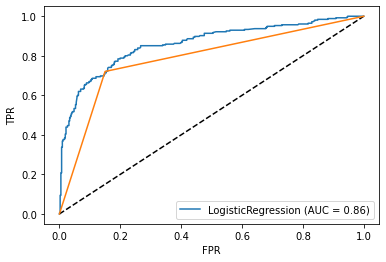

In [66]:
plot_roc_curve(grid_LR,X_train,Y_train)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label = "AUC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Model Saving

In [67]:
import pickle
filename='Predicted_survived.pkl'
pickle.dump(grid_LR,open(filename,'wb'))